In [1]:
!pip install keras cython h5py

    100% |################################| 307kB 3.0MB/s ta 0:00:01
    100% |################################| 3.0MB 504kB/s eta 0:00:01
    100% |################################| 256kB 4.8MB/s eta 0:00:01
  Running setup.py bdist_wheel for pyyaml ... done
  Stored in directory: /root/.cache/pip/wheels/2c/f7/79/13f3a12cd723892437c0cfbde1230ab4d82947ff7b3839a4fc
Successfully built pyyaml


In [1]:
import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

Using TensorFlow backend.


In [2]:
from mnist import MNIST
mndata = MNIST('./python-mnist/data')
training=mndata.load_training()
testing=mndata.load_testing()

In [3]:
X_train=np.array(training[0])

In [4]:
y_train=np.array(training[1])

In [5]:
X_train.shape

(60000, 784)

In [6]:
X_test=np.array(testing[0])
y_test=np.array(testing[1])

In [7]:
X_train = X_train.reshape(60000,28,28)
X_test = X_test.reshape(10000,28,28)

In [8]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255 # scaling
X_test /= 255

In [9]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], X_train.shape[2], 1)# 1 becuase we have 1 channel- because black and white
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], X_test.shape[2], 1)

In [10]:
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

In [11]:
keras.backend

<module 'keras.backend' from '/usr/local/lib/python3.5/dist-packages/keras/backend/__init__.py'>

In [12]:
keras.backend.image_data_format()

'channels_last'

In [13]:
X_train.shape, X_test.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

In [14]:
from keras.layers import Input, Conv2D, MaxPool2D, Dropout, Activation, Dense, Flatten
from keras.models import Sequential
from keras.activations import relu, softmax

In [15]:
mlp = Sequential([
    Dense(24, input_shape=(28,28,1), activation='relu', name = 'dense_1_mlp'),# if insteasd on 24 we put 1- we have LR
    Flatten(name= "flatten_1_mlp"),
    Dense(16, activation='relu', name = 'dense_2_mlp'),# we add another layer
    #Dropout(0.1),# we regularize
    Dense(10, activation='softmax')
])

In [16]:
mlp.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1_mlp (Dense)          (None, 28, 28, 24)        48        
_________________________________________________________________
flatten_1_mlp (Flatten)      (None, 18816)             0         
_________________________________________________________________
dense_2_mlp (Dense)          (None, 16)                301072    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                170       
Total params: 301,290
Trainable params: 301,290
Non-trainable params: 0
_________________________________________________________________


In [17]:
mlp.compile(optimizer=keras.optimizers.SGD(),
           loss=keras.losses.categorical_crossentropy,
           metrics=['accuracy'])

In [18]:
mlp_history=mlp.fit(X_train, y_train, validation_split=.2, epochs=2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/2
48000/48000 [==============================] - 17s 348us/step - loss: 0.6205 - acc: 0.8306 - val_loss: 0.3184 - val_acc: 0.9085
Epoch 2/2
48000/48000 [==============================] - 14s 293us/step - loss: 0.3174 - acc: 0.9102 - val_loss: 0.2798 - val_acc: 0.9207


In [19]:
mlp_history.history

{'acc': [0.83064583333333331, 0.91016666666666668],
 'loss': [0.62053090556959312, 0.31739440353463094],
 'val_acc': [0.90849999999999997, 0.92066666666666663],
 'val_loss': [0.3184414483010769, 0.27983331183095772]}

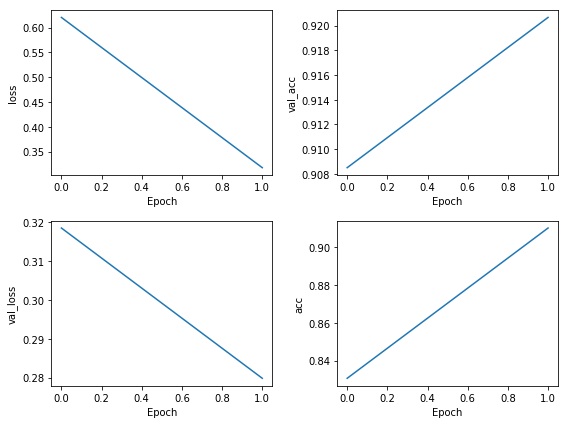

In [20]:
fig = plt.figure(figsize=(8,6))
for i, (title, data) in enumerate(mlp_history.history.items()):
    fig.add_subplot(2,2,1+i)
    plt.plot(data)
    plt.xlabel('Epoch')
    plt.ylabel(title)
plt.tight_layout()

In [21]:
cnn = Sequential([
    Conv2D(16, kernel_size=(5, 5), strides=(2,2),# we have 8 filters
                 activation='relu',
                 input_shape=(28,28,1),
                 padding='same'),
    Conv2D(16, (3, 3), activation='relu'),
    Dropout(.25),#regularize
    MaxPool2D(),
    Flatten(),
    Dense(64, activation='relu'),
    Dropout(.25),#regularize
    Dense(10, activation='softmax')
])

In [22]:
cnn.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 14, 14, 16)        416       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 12, 12, 16)        2320      
_________________________________________________________________
dropout_1 (Dropout)          (None, 12, 12, 16)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 16)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 576)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)                36928     
_________________________________________________________________
dropout_2 (Dropout)          (None, 64)                0         
__________

In [23]:
cnn.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

In [24]:
from keras.callbacks import TensorBoard, EarlyStopping

In [25]:
tb = TensorBoard(log_dir='./tf_logs/cnn/')
es=EarlyStopping(patience=0)

In [26]:
cnn_history = cnn.fit(X_train, y_train, validation_split=.3, epochs=10, callbacks=[tb,es])# when we ran it again, we continue fitting

Train on 42000 samples, validate on 18000 samples
Epoch 1/10
42000/42000 [==============================] - 19s 445us/step - loss: 0.3664 - acc: 0.8868 - val_loss: 0.1496 - val_acc: 0.9573
Epoch 2/10
42000/42000 [==============================] - 16s 379us/step - loss: 0.1696 - acc: 0.9501 - val_loss: 0.1116 - val_acc: 0.9669
Epoch 3/10
42000/42000 [==============================] - 16s 380us/step - loss: 0.1369 - acc: 0.9588 - val_loss: 0.0950 - val_acc: 0.9724
Epoch 4/10
42000/42000 [==============================] - 16s 391us/step - loss: 0.1174 - acc: 0.9647 - val_loss: 0.0833 - val_acc: 0.9754
Epoch 5/10
42000/42000 [==============================] - 18s 429us/step - loss: 0.1029 - acc: 0.9692 - val_loss: 0.0780 - val_acc: 0.9773
Epoch 6/10
42000/42000 [==============================] - 16s 377us/step - loss: 0.0933 - acc: 0.9721 - val_loss: 0.0739 - val_acc: 0.9783
Epoch 7/10
42000/42000 [==============================] - 16s 374us/step - loss: 0.0871 - acc: 0.9739 - val_loss: 0.

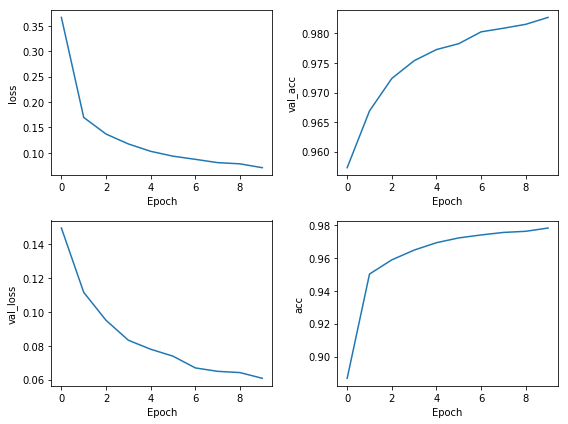

In [27]:
fig = plt.figure(figsize=(8,6))
for i, (title, data) in enumerate(cnn_history.history.items()):
    fig.add_subplot(2,2,1+i)
    plt.plot(data)
    plt.xlabel('Epoch')
    plt.ylabel(title)
plt.tight_layout()